<a href="https://colab.research.google.com/github/RutwikBorkar/TASK1/blob/main/ML_Major_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rutwik Borkar

Machine Learning September Batch

**Machine Learning Major Project**

**Sentiment Analysis for Restaurant Reviews**

There are two features -'review' - the sentence and 'sentiment' - the label for the review. 1 means positive review and 0 means negative review

# 1. Process the data

In [ ]:
import pandas as pd

In [ ]:
# read the dataset
df = pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.shape

(1000, 2)

1    500
0    500
Name: Liked, dtype: int64

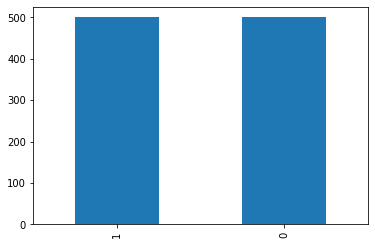

In [ ]:
# we plot a bar graph just to check the count of positive and negative reviews
import matplotlib.pyplot as plt
df['Liked'].value_counts().plot(kind='bar')
df['Liked'].value_counts()

In [ ]:
# Here we take 2 variables which contains the input and output data
# x - Input data
# y - Output data
x = df['Review'] 
y = df['Liked']  

In [ ]:
# we use train_test_split to split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
x_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

Processing of data is done

# 2.Cleaning of data using stemming

In [ ]:
# we download the stopwords , punkt and wordnet
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# stemming for x_train data
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
x_train_stem = []
x_test_stem = []
def stemming(review):
  review = re.sub('[^a-zA-Z]',' ',review)
  review = review.lower()
  review = review.split()
  review_stem = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
  review_stem = ' '.join(review_stem)
  x_train_stem.append(review_stem)

In [ ]:
# rand varibale is used just to apply stemming function for x_train data
rand = x_train.apply(stemming)
x_train_stem[:5]

['overal think would take parent place made similar complaint silent felt',
 'chef gener time even came around twice take pictur',
 'love pho spring roll oh yummi tri',
 'know big deal place back ya',
 'scallop dish quit appal valu well']

In [ ]:
# stemming for x_test data
def stemming(review):
  review = re.sub('[^a-zA-Z]',' ',review)
  review = review.lower()
  review = review.split()
  review_stem = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
  review_stem = ' '.join(review_stem)
  x_test_stem.append(review_stem)

In [ ]:
# rand2 variable is used just to apply stemming function for x_test data
rand2 = x_test.apply(stemming)
x_test_stem[:5]

['present food aw',
 'worst food servic',
 'never dine place',
 'guess mayb went night disgrac',
 'sushi lover avoid place mean']

Cleaning of data is done using stemming

#3. Creating a pipeline with vectorization model

In [ ]:
# Pipeline with CountceVtorizer and MultinomialNB model
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
text_model = make_pipeline(CountVectorizer(),MultinomialNB()) # pipeline is created

Pipeline is created using CountVectorizer and MultinomialNB

# 4. ML algorithm to predict the final sentiment

In [ ]:
# we fit the train and test data into the model
text_model.fit(x_train_stem,y_train)

y_pred = text_model.predict(x_test_stem) # predict the output for test data
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
# we check the accuracy from accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.756

Here '0' represents negative review , and '1' represents positive review

In [ ]:
# predict the output for sentence in the dataset
text_model.predict(['The fries were great too.'])

array([1])

In [ ]:
# predict the output for sentence in the dataset
text_model.predict(['This place is not worth your time, let alone Vegas.'])

array([0])

In [ ]:
# predict the output for sentence which is not in the dataset
text_model.predict(['A very good place to visit , and the service is very good to all the customers'])

array([1])

In [ ]:
# predict the output for sentence which is not in the dataset
text_model.predict(['This is the worst place i have ever visited , no proper facilities'])

array([0])

**Finally the machine predicts the positive and negative reviews.**